In [147]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import radon as ski_radon

In [148]:
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img1 = img1.astype(float) / 255.0
# plt.imshow(img1, cmap='gray')

img2 = cv2.imread('dog.bmp', cv2.IMREAD_GRAYSCALE)
img2 = img2.astype(float) / 255.0
# plt.imshow(img2, cmap='gray')

squares = cv2.imread('Two_Squares.png', cv2.IMREAD_GRAYSCALE)
squares = squares.astype(float) / 255.0
# plt.imshow(squares, cmap='gray')

In [149]:
def rotate_image(image, theta = 0):
    h, w = image.shape[:2]

    # theta_rad = np.radians(theta)
    # new_w = int(w * abs(np.cos(theta_rad)) + h * abs(np.sin(theta_rad)))
    # new_h = int(w * abs(np.sin(theta_rad)) + h * abs(np.cos(theta_rad)))

    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), theta, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    return rotated_image

In [150]:
def radon(image, theta_change = None, r_change = 1):
    theta = np.arange(0, 180, theta_change)

    diagonal = np.sqrt(2) * max(image.shape)
    pad = np.ceil(diagonal - np.array(image.shape)).astype(int)
    new_center = (np.array(image.shape) + pad) // 2
    old_center = np.array(image.shape) // 2
    pad_before = new_center - old_center
    pad_width = [(pb, p - pb) for pb, p in zip(pad_before, pad)]
    image = np.pad(image, pad_width, mode='constant', constant_values=0)

    radon_image = np.zeros((image.shape[0], len(theta)))

    for i, angle in enumerate(theta):
        rotated = rotate_image(image, -angle)
        radon_image[::r_change, i] = np.sum(rotated, axis=0)[::r_change]

    return radon_image

In [151]:
def run(img, theta_change = 1):
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')

    img1_radon = radon(img, theta_change)
    plt.subplot(1,3,2)
    plt.imshow(img1_radon, cmap='gray')
    plt.title('Custom Function')

    img1_radon = ski_radon(img, circle = False, theta=np.arange(0,180,theta_change))
    plt.subplot(1,3,3)
    plt.imshow(img1_radon, cmap='gray')
    plt.title('Inbuilt Function')

    plt.tight_layout()
    plt.show()

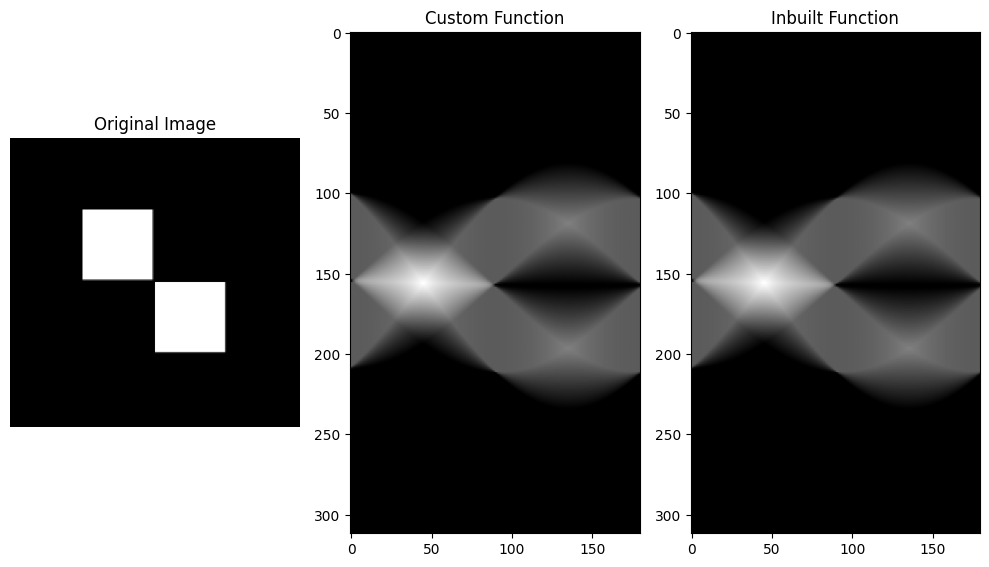

In [152]:
run(squares)

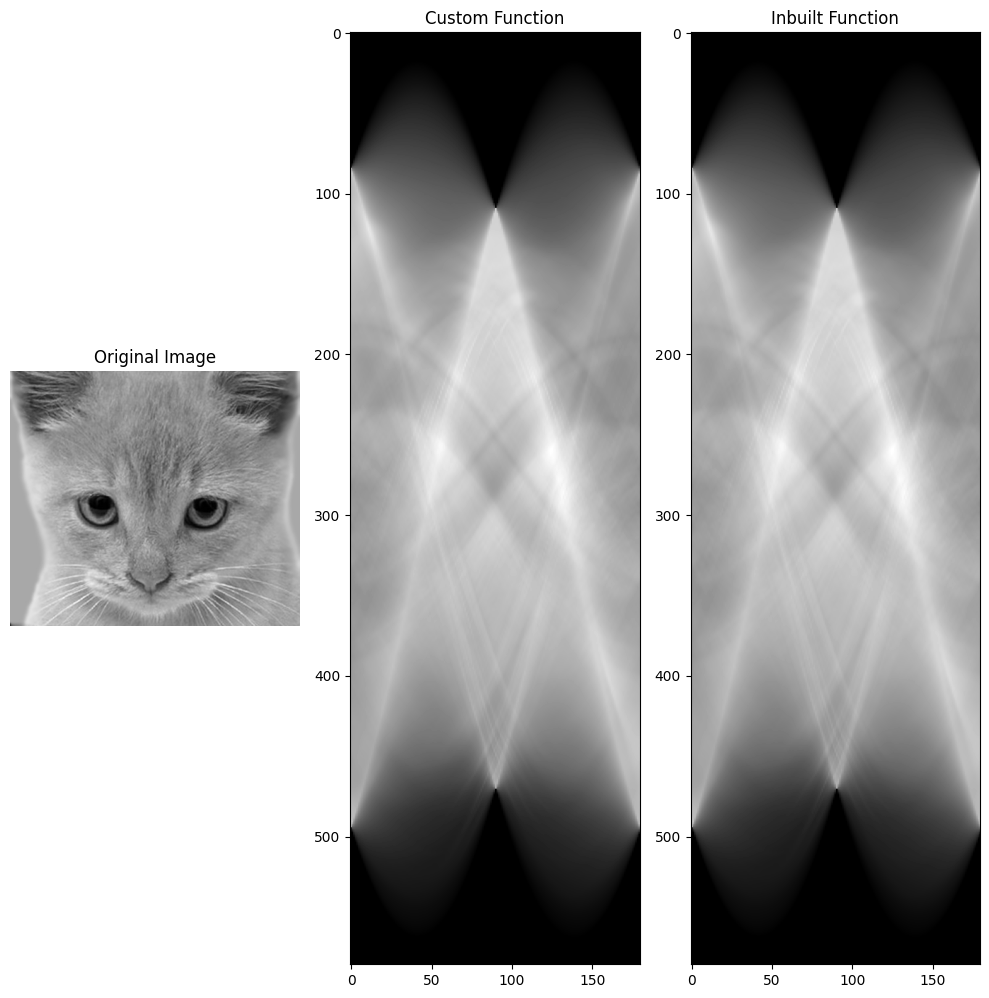

In [153]:
run(img1)

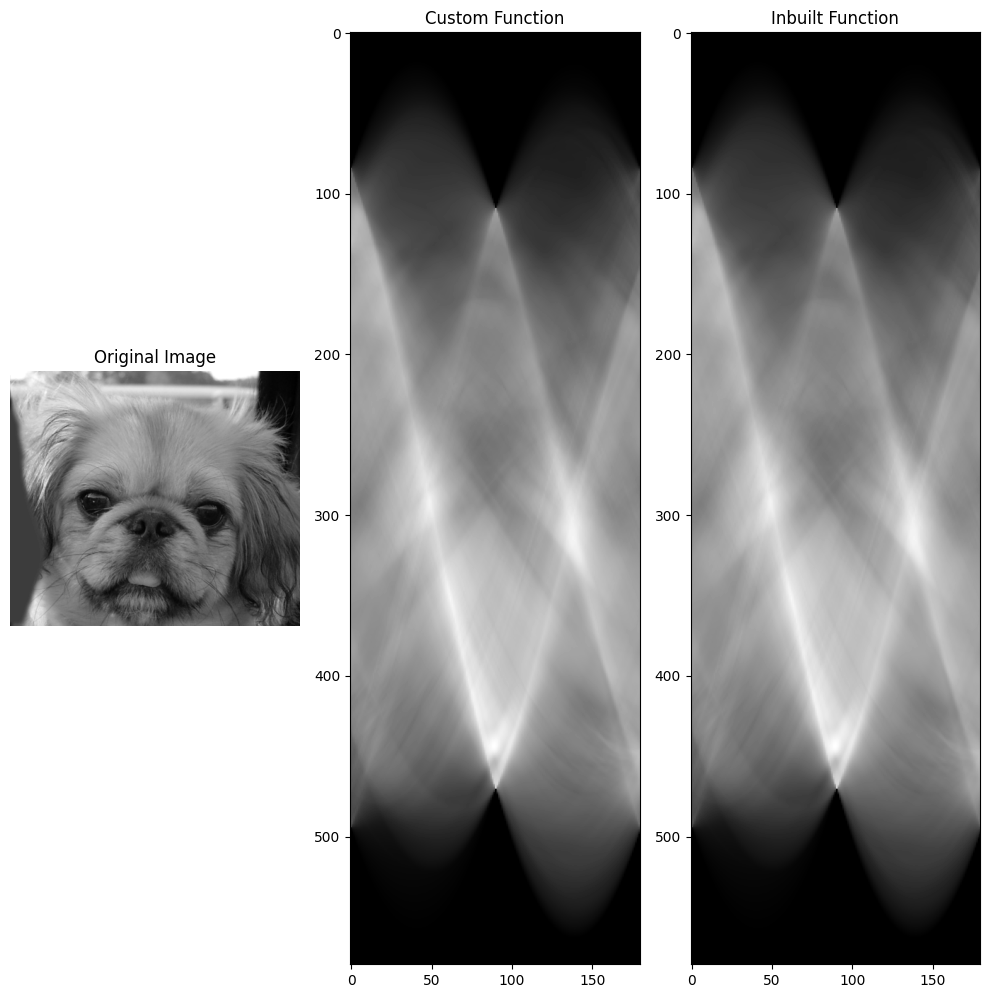

In [154]:
run(img2)

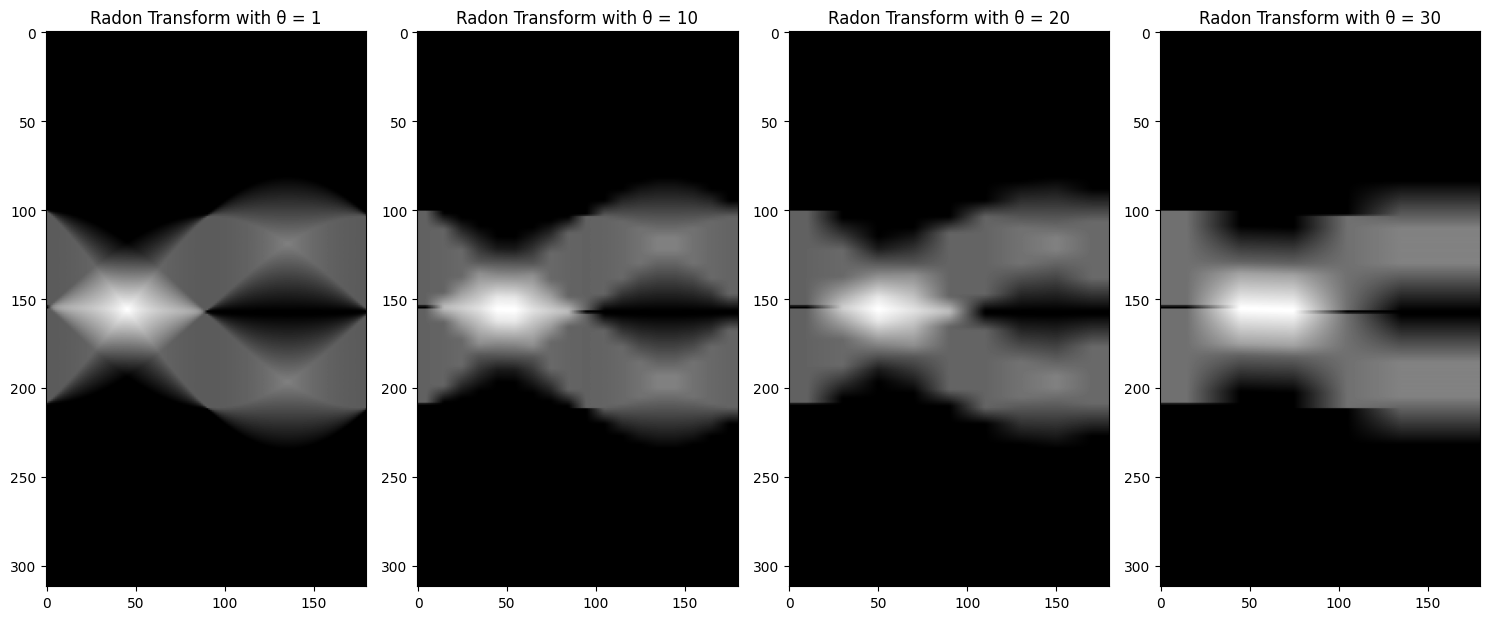

In [155]:
plt.figure(figsize=(15, 15))

for theta in [1, 10, 20, 30]:
    img1_radon = radon(squares, theta)
    img1_radon_resized = cv2.resize(img1_radon, (180, img1_radon.shape[0]))

    plt.subplot(1, 4, theta//10 + 1)
    plt.imshow(img1_radon_resized, cmap='gray')
    plt.title(f"Radon Transform with θ_change = {theta}")

plt.tight_layout()
plt.show()

We cas see from the above sinograms, that as we change the angle of the projection, the sinogram changes. The resolution of the sinogram depends on the value of `θ_change`, and it has inverse proportionality with the value of theta. The higher the value of theta, the lower the resolution of the sinogram. This is because the higher the value of theta, the less number of projections we have, and hence the less information we have about the object.

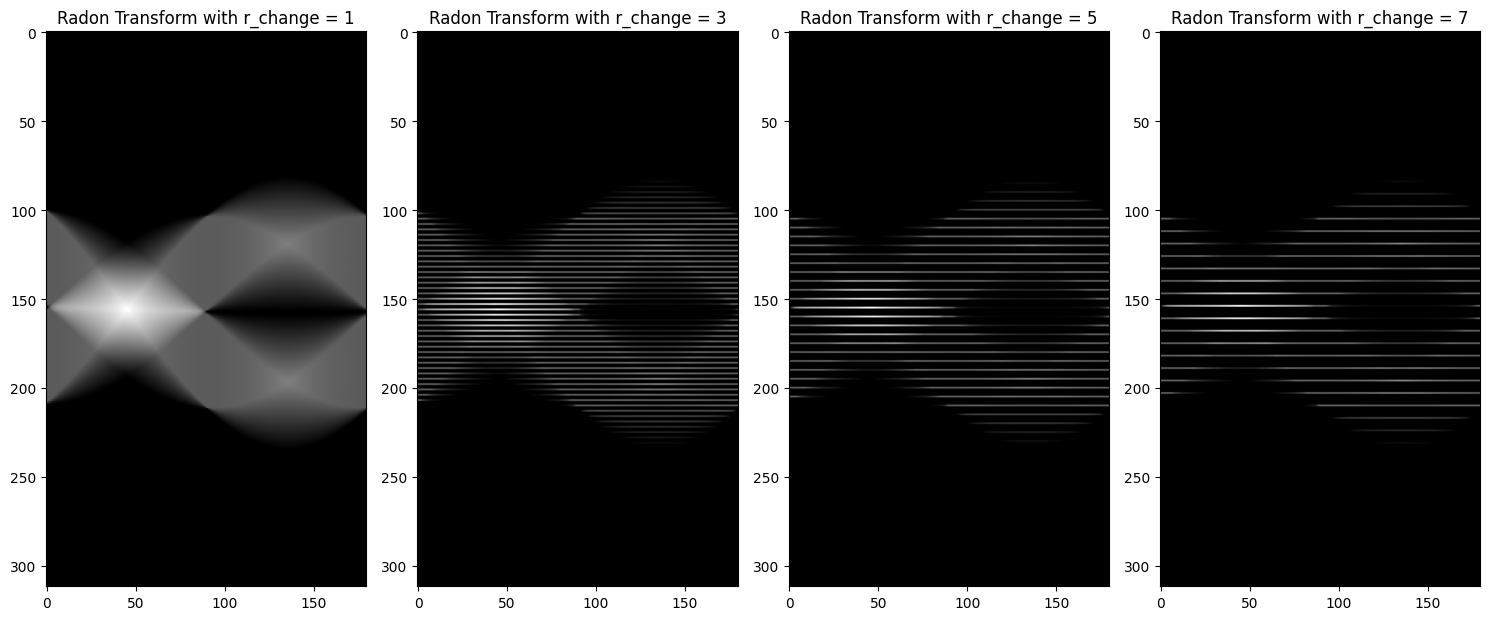

In [156]:
plt.figure(figsize=(15, 15))

for r in [1, 3, 5, 7]:
    img1_radon = radon(squares, 1, r_change = r)
    img1_radon_resized = cv2.resize(img1_radon, (180, img1_radon.shape[0]))

    plt.subplot(1, 4, r//2 + 1)
    plt.imshow(img1_radon_resized, cmap='gray')
    plt.title(f"Radon Transform with r_change = {r}")

plt.tight_layout()
plt.show()

We see from the above sinogram that the continuity in the sinogram depends on the value of `r_change`. As we decrease the value of `r_change`, the continuity in the sinogram increases. This is because the lower the value of `r_change`, the more number of projectors we have, thus we can capture more continuous information about the object at the the level of distance.